<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_62_Decision_Trees_Hyperparameters_Overfitting_Underfitting/Lecture_62_Regression_Trees_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics # This library is not explicitly used for evaluation in the current notebook, but keeping it in case needed later.
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [36]:
# Load the dataset
df = pd.read_csv('/content/BostonHousing.csv')
# Display the first 5 rows of the dataframe
display(df.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [37]:
# Get the shape of the dataframe (number of rows and columns)
df.shape

(506, 14)

In [38]:
# Check for missing values in each column
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [39]:
# Get concise summary of the dataframe, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [40]:
# Separate features (X) and target variable (y)
X = df.iloc[:,0:13]  # All columns except the last one are features
y = df.iloc[:,13]   # The last column ('medv') is the target variable

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Initialize and train a Decision Tree Regressor model
# criterion='squared_error' is used for regression, max_depth limits the tree depth
rt = DecisionTreeRegressor(criterion = "squared_error", max_depth=5)
rt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [43]:
# Make predictions on the test set
y_pred = rt.predict(X_test)

In [44]:
# Calculate the R-squared score to evaluate the model's performance
r2_score(y_test, y_pred)

0.7937140365309365

## **Hyperparameter Tuning**

In [45]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [2, 4, 8, 10, None], # Different values for max_depth
    'criterion': ['squared_error','absolute_error'], # Different criteria for splitting nodes
    'max_features': [0.25, 0.5, 1.0], # Different proportions of features to consider for the best split
    'min_samples_split':[0.25, 0.5, 1.0] # Different proportions of minimum samples required to split an internal node
}

In [46]:
# Initialize GridSearchCV with the Decision Tree Regressor and the parameter grid
reg = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid)

In [47]:
# Fit GridSearchCV to the training data to find the best hyperparameters
reg.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [48]:
# Get the best R-squared score found by GridSearchCV
reg.best_score_

np.float64(0.6313421569328959)

In [49]:
# Get the best hyperparameters found by GridSearchCV
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 0.5}

# **Feature Importance**

In [50]:
# Print feature importances from the trained Decision Tree Regressor
# Feature importance indicates the relative importance of each feature in making predictions
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns), reverse=True):
  print(name, importance)

rm 0.6511964103521208
lstat 0.21719316328073857
dis 0.06659581258597877
crim 0.03550388785640835
b 0.011905660139828177
age 0.007025459165410705
ptratio 0.004391097507128798
nox 0.003561040385702662
indus 0.0026274687266831117
zn 0.0
tax 0.0
rad 0.0
chas 0.0


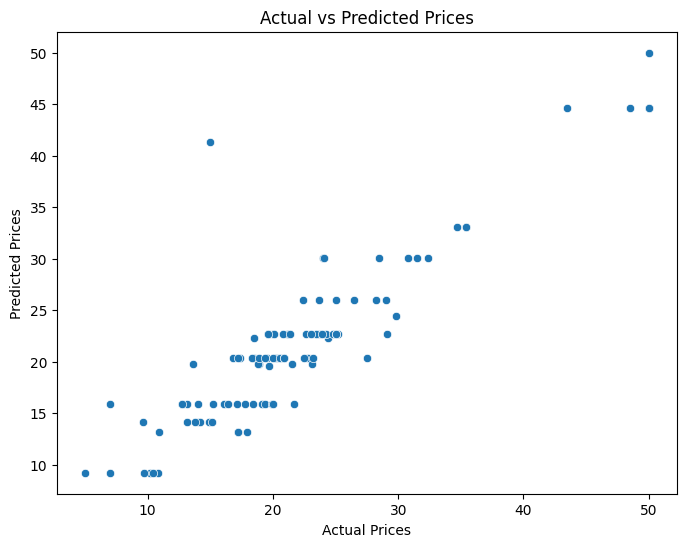

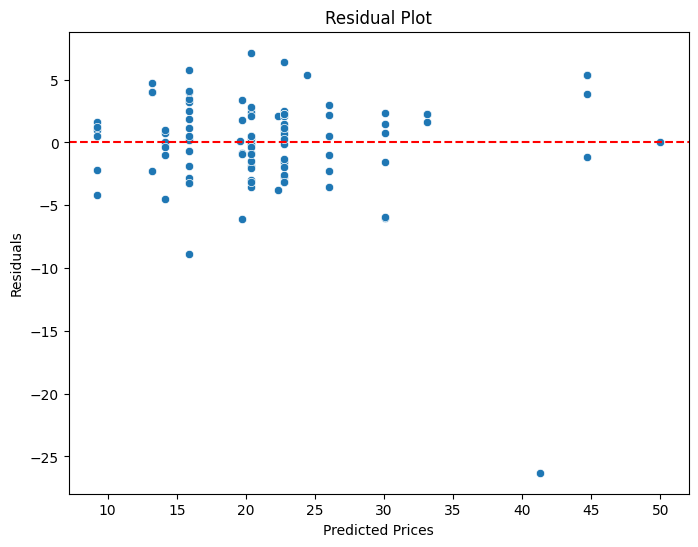

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs actual values
# This plot helps visualize how well the predicted values match the actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Residual plot
# Residuals are the differences between actual and predicted values
# This plot helps identify patterns in the errors (residuals) of the model
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()